In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATADIR = "/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data"
!ls {DATADIR}

sample_submission.csv  test  train  train_labels.csv


In [4]:
traindf = pd.read_csv(f"data/train_labels.csv")
print(f"df size = {traindf.shape}")
traindf.sample(10)

df size = (2424186, 2)


,image_id,InChI
204941,159d060e1629,InChI=1S/C15H15ClN2O2/c1-20-13-5-3-2-4-11(13)6...
315814,214832a0e530,InChI=1S/C25H32N2O2/c1-18(2)26-25(29)21-14-9-1...
1122318,766e5e86da5d,InChI=1S/C21H14BrFN2O3S2/c22-14-3-2-13(15(23)8...
957767,6517aef18d5e,InChI=1S/C20H25F2N3O/c21-20(22)26-19-8-4-7-17(...
1537374,a24b9e236865,InChI=1S/C12H9ClO4/c13-8-3-4-11(10(6-8)12(14)1...
806104,550ee748449b,InChI=1S/C27H35N3O6/c1-32-10-11-33-12-13-34-14...
2047352,d8149ebf00c5,InChI=1S/C11H14FNO2/c1-13-10(7-11(14)15)6-8-3-...
1702556,b3bf7b9d55e8,InChI=1S/C17H22FN3O3/c1-17(2)10-24-11-21(17)16...
1517551,a036f4aacdfd,InChI=1S/C11H20N4O/c1-12-6-5-10-13-11(14-16-10...
119932,0ca2bb1416b3,InChI=1S/C16H26N2O4/c1-12(2)3-4-18-13(11-19)9-...


In [5]:
from pathlib import Path

In [20]:
train_imgpaths = Path(f"{DATADIR}/train").rglob('*.*')

In [21]:
[next(train_imgpaths) for _ in range(10)]

[PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/999e1305f397.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/9993e33f8dd9.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/999fbfd446f5.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/999f7451e589.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/99968575b343.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/999770e766ed.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/99949d3b8b60.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/9993445c61f3.png'),
 PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/999ba83ea60a

(331, 435)


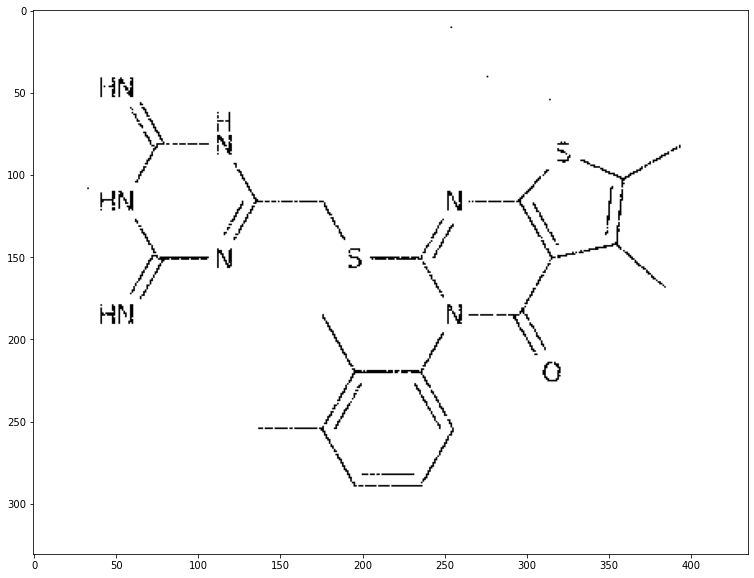

In [47]:
imgpath = next(train_imgpaths)
traindf[traindf.image_id == imgpath.stem]["InChI"].values[0]

img = plt.imread(imgpath)
print(img.shape)
plt.figure(figsize=(15,10))
plt.savefig("rpppt.jpg")
plt.imshow(img, cmap='gray')

# Can we construct better images using forumla converter and then train a network than can reconstruct the above input image into a better one??

In [10]:
import cv2
import numpy as np

In [11]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

def sharpen(img):
    # SHARPEN
    kernel_sharp = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
    return cv2.filter2D(img, -1, kernel_sharp)

In [12]:
# edge_img = auto_canny((img*255).astype(np.uint8))
# plt.figure(figsize=(15,10))
# plt.imshow(edge_img, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


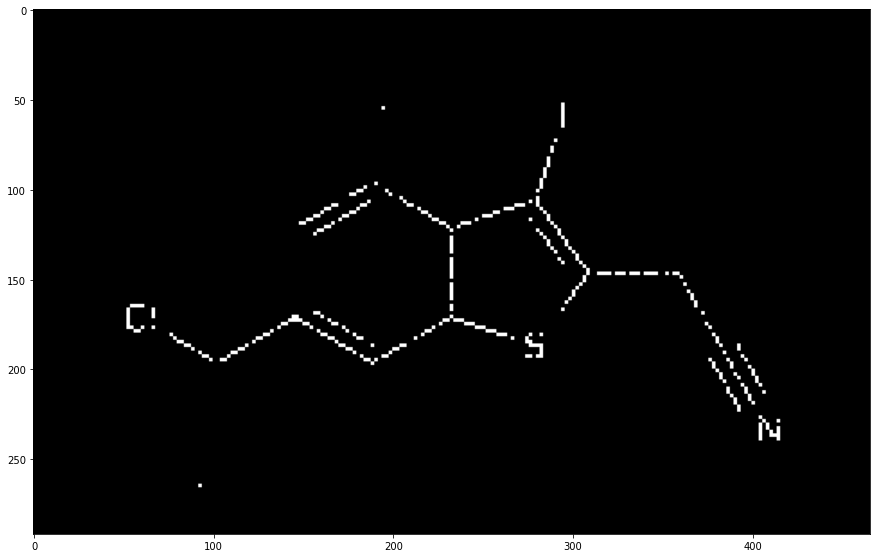

In [13]:
plt.figure(figsize=(15,10))
# blur = cv2.bilateralFilter(img,5,200,250)
# blur = cv2.GaussianBlur(img,(5,5),0)
# blur = 1-blur
blur = 1 - img
blur = cv2.resize(blur, (blur.shape[1]*2, blur.shape[0]*2), interpolation=cv2.INTER_NEAREST)
# blur = cv2.medianBlur(blur, 3)
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
# blur = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel)
# blur = cv2.bilateralFilter(blur,5,200,250)
blur = sharpen(np.stack((blur, blur, blur), axis=-1))
# blur = cv2.dilate(blur, np.ones((3,3)))

plt.imshow(blur, cmap='gray')

# Watershed 
[blog](https://www.pyimagesearch.com/2015/11/02/watershed-opencv/)

In [14]:
import imutils
from skimage.segmentation import watershed
from scipy import ndimage
from skimage.feature import peak_local_max

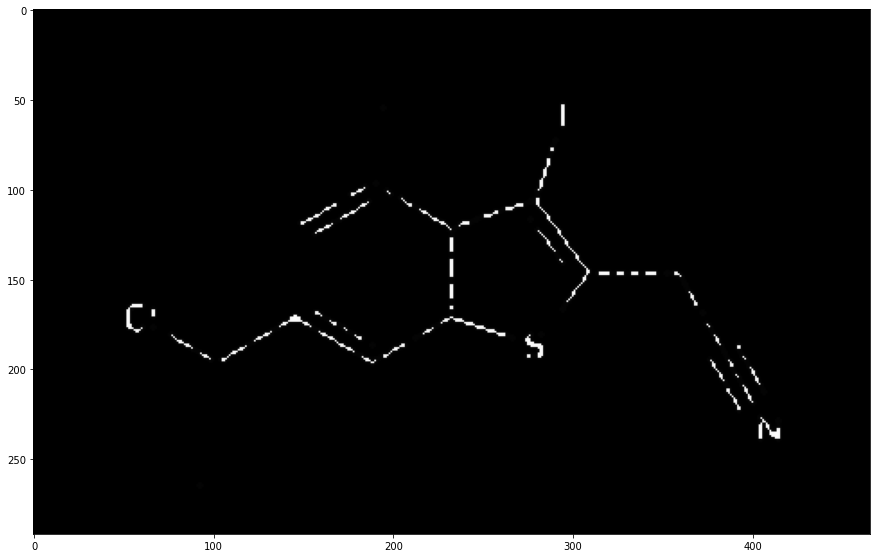

In [15]:
plt.figure(figsize=(15,10))
plt.imshow(ndimage.median_filter((blur*255).astype(np.uint8), 3), cmap='gray')

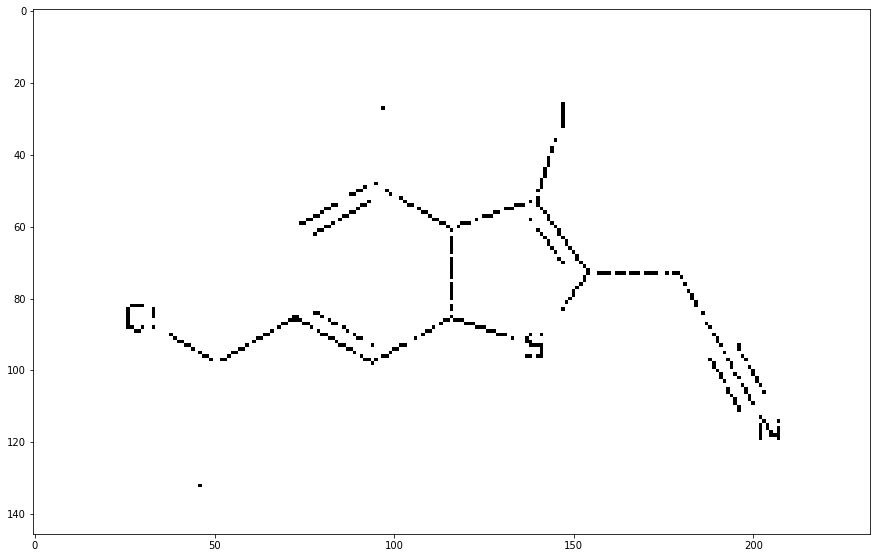

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')

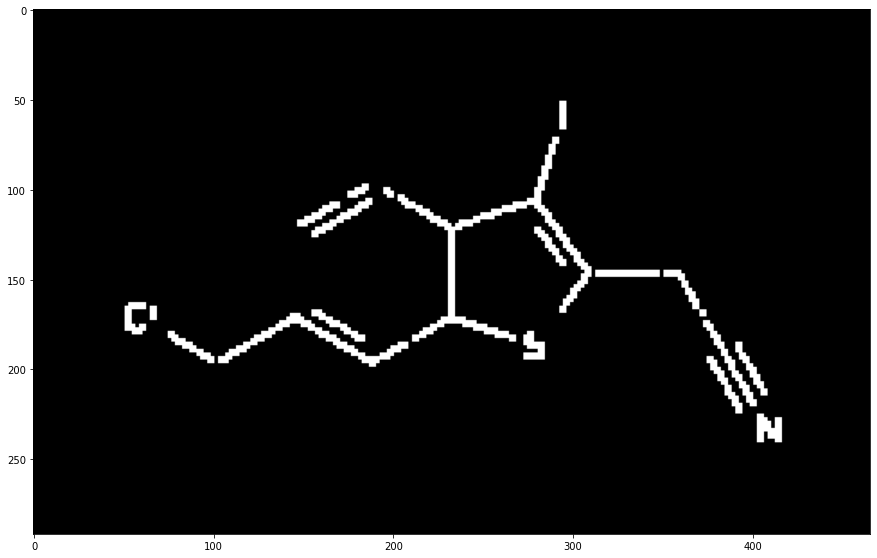

In [17]:
from preprocessing import preprocess_image
plt.figure(figsize=(15,10))
plt.imshow(preprocess_image(img), cmap='gray')

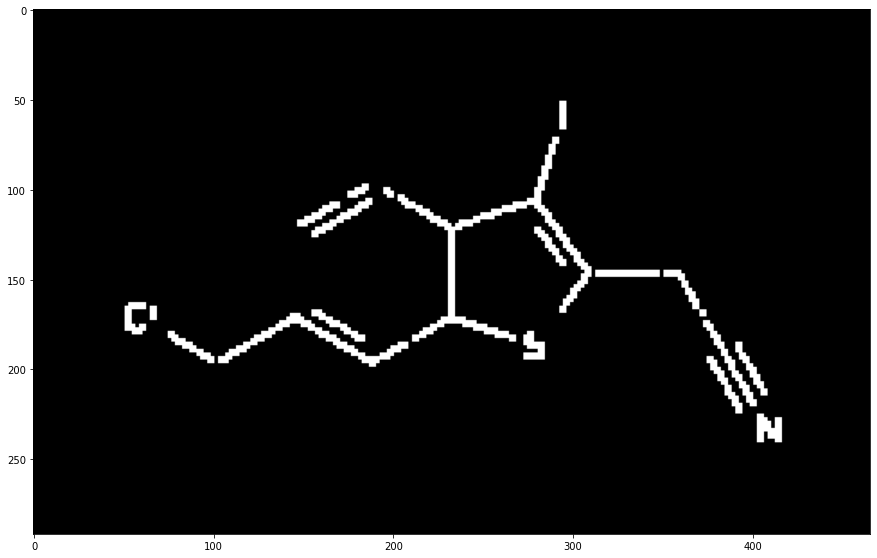

In [18]:
from preprocessing import preprocess_image
plt.figure(figsize=(15,10))
plt.imshow(preprocess_image(img), cmap='gray')

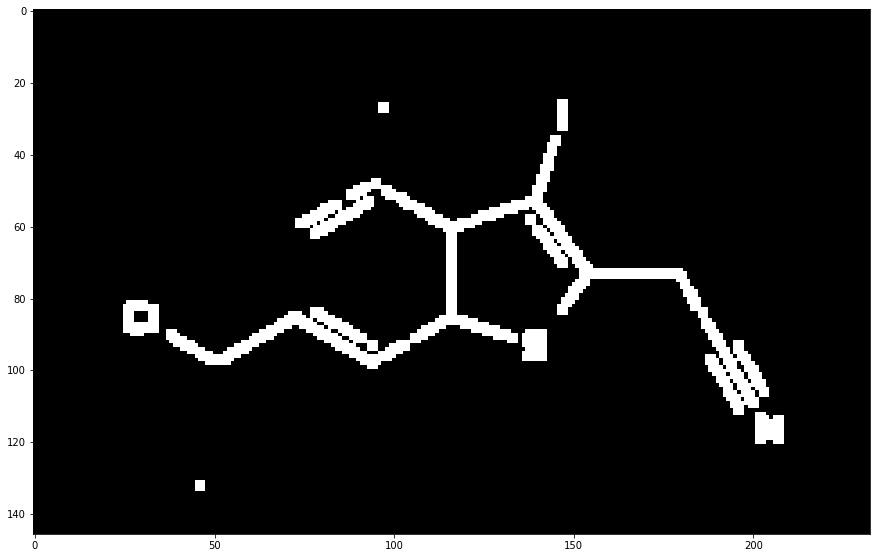

In [19]:
im4 = 1 - img
im4 = cv2.dilate(im4, np.ones((3,3)))
plt.figure(figsize=(15,10))
plt.imshow(im4, cmap='gray')

[INFO] 26 unique contours found
[INFO] 19 unique contours found


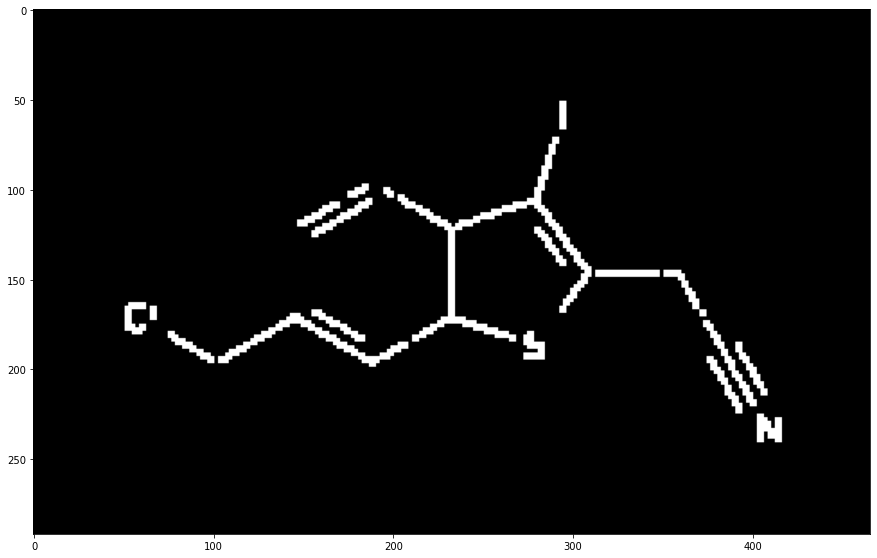

In [20]:
image = (blur*255).astype(np.uint8)

# find contours in the thresholded image
cnts = cv2.findContours(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
    if cv2.contourArea(c) < 10:
        continue
    # draw the contour
#     ((x, y), _) = cv2.minEnclosingCircle(c)
#     cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    image[image >= 150] = 255
    image[image < 150] = 0
    cv2.drawContours(image, [c], -1, (0, 255, 0), 1)
    cv2.fillPoly(image, [c], color=(0,255,0))
image = image[...,1] - image[...,0]
# image = ndimage.median_filter(image, 3)

image = np.stack((image, image, image), axis=-1)
# find contours in the thresholded image
cnts = cv2.findContours(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the contour
#     ((x, y), _) = cv2.minEnclosingCircle(c)
#     cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
#     image[image >= 150] = 255
#     image[image < 150] = 0
    cv2.drawContours(image, [c], -1, (0, 255, 0), 1)
    cv2.fillPoly(image, [c], color=(0,255,0))
image = image[...,1] #- image[...,0]
# image = ndimage.median_filter(image, 3)


plt.figure(figsize=(15,10))
plt.imshow(image, cmap='gray')

[INFO] 74 unique contours found


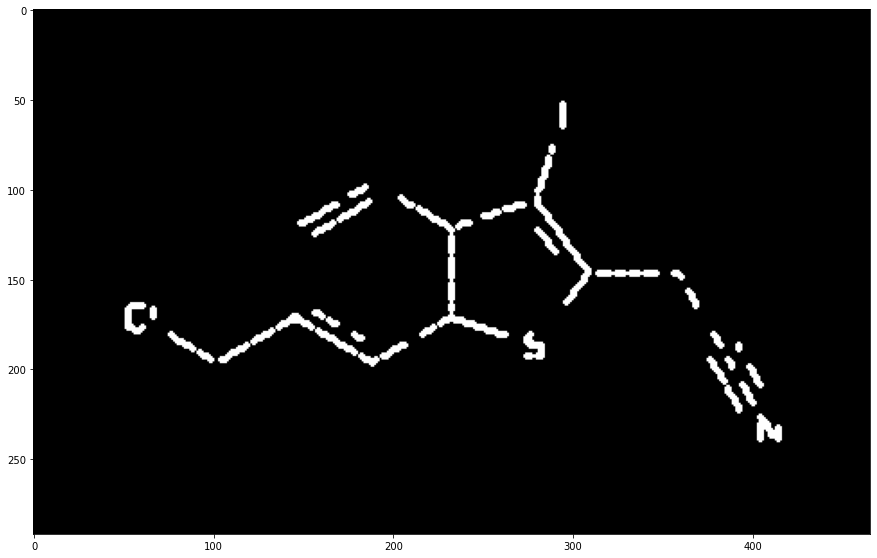

In [21]:
# WITHOUT WATERSHED
image = (blur*255).astype(np.uint8)
shifted = cv2.pyrMeanShiftFiltering(image, 2, 5)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
    if cv2.contourArea(c) < 3:
        continue
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
#     cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    image[image >= 150] = 255
    image[image < 150] = 0
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.fillPoly(image, [c], color=(0,255,0))
image = image[...,1] - image[...,0]
    
# image = cv2.erode(image, np.ones((3,3)))
plt.figure(figsize=(15,10))
plt.imshow(image, cmap='gray')

In [22]:
import torch
from torch.nn.functional import max_pool2d, avg_pool2d

In [23]:
im3 = torch.Tensor(image).unsqueeze(0).unsqueeze(0)
im3.shape

torch.Size([1, 1, 292, 466])

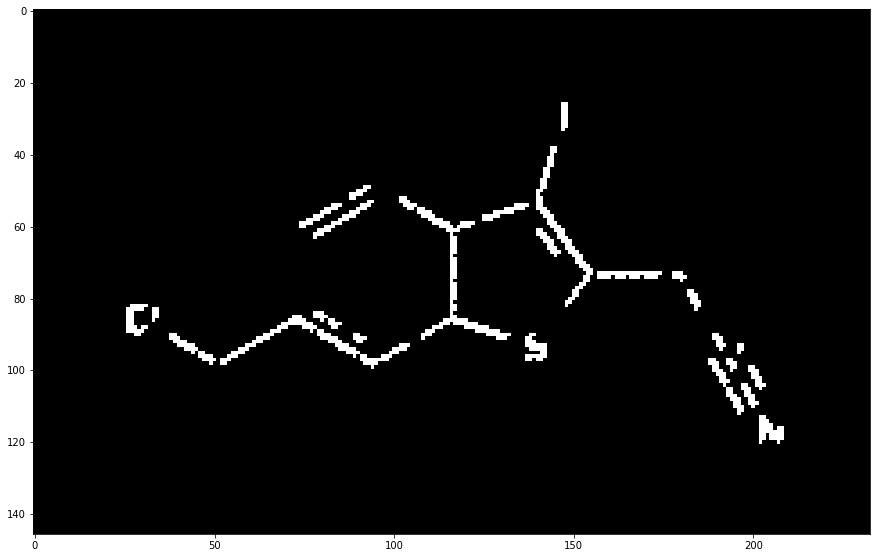

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.resize(image, (blur.shape[1]//2, blur.shape[0]//2), interpolation=cv2.INTER_NEAREST), cmap='gray')

(145, 232)


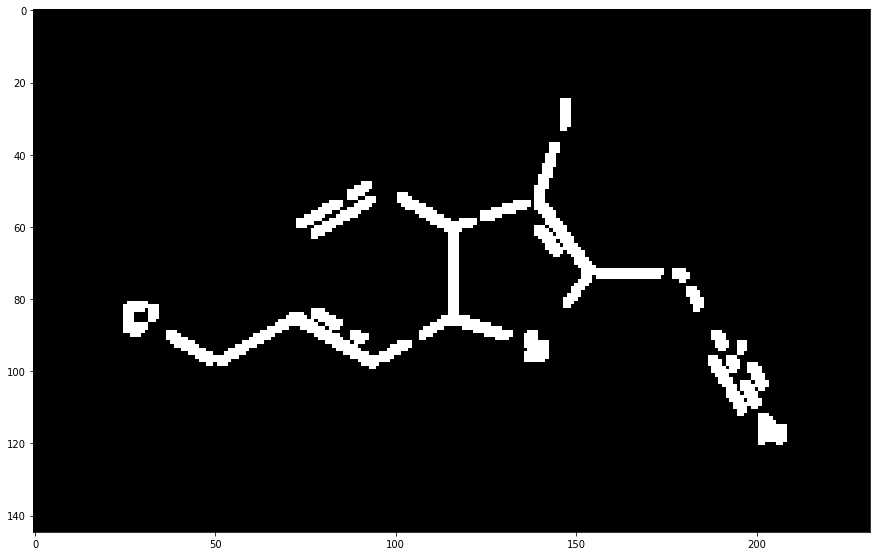

In [25]:
plt.figure(figsize=(15,10))
out = max_pool2d(im3, kernel_size=3, stride=2).squeeze(0).squeeze(0).numpy().astype(np.uint8)
print(out.shape)
plt.imshow(out, cmap='gray')

# Convolution-based line detection

In [26]:
import torch
from torch.nn.functional import conv2d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(146, 233, 3)


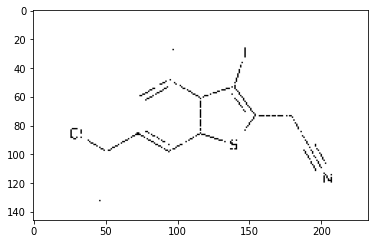

In [31]:
im = sharpen(np.stack((img, img, img), axis=-1))
print(im.shape)
plt.imshow(im, cmap='gray')

In [38]:
def conv_line_detection(im):
    im = torch.Tensor(im).unsqueeze(0).unsqueeze(0)
    
    horizontal_mask = torch.tensor([[[[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]]], dtype=torch.float)
    vertical_mask = torch.tensor([[[[-1,  2, -1], [-1,  2, -1], [-1,  2, -1]]]], dtype=torch.float)
    oblique_r2_mask = torch.tensor([[[[-1,  -1, 2], [-1,  2, -1], [2,  -1, -1]]]], dtype=torch.float)
    oblique_r4_mask = torch.tensor([[[[2,  -1, -1], [-1,  2, -1], [-1,  -1, 2]]]], dtype=torch.float)
    print(horizontal_mask.shape)
    
    im1 = conv2d(im, horizontal_mask, stride=1, padding=1)
    im1[im1 <= 0] = 0
    im1[im1 > 0] = 255
    im2 = conv2d(im, vertical_mask, stride=1, padding=1)
    im2[im2 <= 0] = 0
    im2[im2 > 0] = 255
    im3 = conv2d(im, oblique_r2_mask, stride=1, padding=1)
    im3[im3 <= 0] = 0
    im3[im3 > 0] = 255
    im4 = conv2d(im, oblique_r4_mask, stride=1, padding=1)
    im4[im4 <= 0] = 0
    im4[im4 > 0] = 255

    return (im1 + im2 + im3 + im4) / 4

In [39]:
out = conv_line_detection(img)
out.shape

torch.Size([1, 1, 3, 3])


torch.Size([1, 1, 146, 233])

In [40]:
imim = out.squeeze(0).squeeze(0).numpy().astype(np.uint8)
# imim[imim >= 50] = 255
# imim[imim < 50] = 0

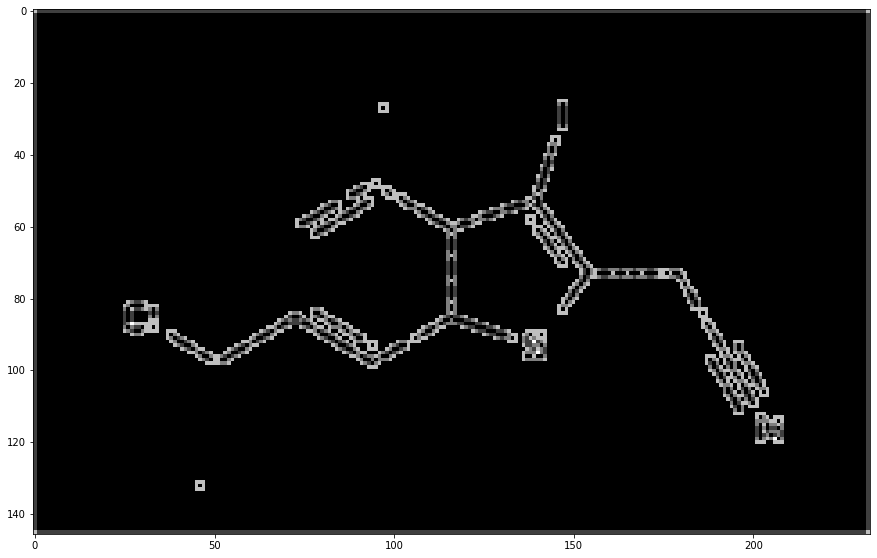

In [41]:
plt.figure(figsize=(15,10))
plt.imshow(imim, cmap='gray')

# Labels EDA

In [42]:
traindf.InChI.iloc[0]

'InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3'

In [43]:
traindf.InChI

0          InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1          InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2          InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3          InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4          InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...
                                 ...                        
2424181    InChI=1S/C10H12F2N2O3/c1-17-7-2-5(3-8(15)16)9(...
2424182    InChI=1S/C19H20F2N4O3S/c1-10(8-20)28-14-7-12(2...
2424183    InChI=1S/C22H26Cl2N2O4S/c1-16-6-2-3-10-21(16)3...
2424184    InChI=1S/C17H26N2O6S/c1-23-16-12-14(4-5-15(16)...
2424185    InChI=1S/C10H18N2O9P2/c1-7-10(13)9(5-11-2-3-20...
Name: InChI, Length: 2424186, dtype: object

In [44]:
labels = list(map(lambda x: x.split('/'), traindf.InChI.values.tolist()))

In [45]:
len(labels)

2424186

In [46]:
labels[:10]

[['InChI=1S',
  'C13H20OS',
  'c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14',
  'h5-7,9,11,14H,8H2,1-4H3'],
 ['InChI=1S',
  'C21H30O4',
  'c1-12(22)25-14-6-8-20(2)13(10-14)11-17(23)19-15-4-5-18(24)21(15,3)9-7-16(19)20',
  'h13-16,19H,4-11H2,1-3H3',
  't13-,14+,15+,16-,19-,20+,21+',
  'm1',
  's1'],
 ['InChI=1S',
  'C24H23N5O4',
  'c1-14-13-15(7-8-17(14)28-12-10-20(28)30)27-11-9-16-21(23(25)31)26-29(22(16)24(27)32)18-5-3-4-6-19(18)33-2',
  'h3-8,13H,9-12H2,1-2H3,(H2,25,31)'],
 ['InChI=1S',
  'C17H24N2O4S',
  'c1-12(20)18-13(14-7-6-10-24-14)11-15(21)19-17(16(22)23)8-4-2-3-5-9-17',
  'h6-7,10,13H,2-5,8-9,11H2,1H3,(H,18,20)(H,19,21)(H,22,23)'],
 ['InChI=1S',
  'C10H19N3O2S',
  'c1-15-10(14)12-8-4-6-13(7-8)5-2-3-9(11)16',
  'h8H,2-7H2,1H3,(H2,11,16)(H,12,14)'],
 ['InChI=1S',
  'C19H22Br2N2O2',
  'c1-13(2)10-16(19(24)25)23(9-8-14-6-4-3-5-7-14)15-11-17(20)22-18(21)12-15',
  'h3-7,11-13,16H,8-10H2,1-2H3,(H,24,25)'],
 ['InChI=1S',
  'C17H10BrN3O',
  'c18-14-7-3-1-5-11(14)9-12(10-19)16-20-15-8-4-2-6-

In [47]:
inchis = [l[0] for l in labels]

In [48]:
np.unique(inchis)

array(['InChI=1S'], dtype='<U8')

In [49]:
len([l for l in labels if len(l) < 4])

307

In [50]:
names = [l[1] for l in labels]
len(names)

2424186

In [51]:
np.unique(names).shape

(329768,)

In [52]:
from collections import Counter

In [53]:
Counter(names)

Counter({'C13H20OS': 37,
         'C21H30O4': 71,
         'C24H23N5O4': 50,
         'C17H24N2O4S': 156,
         'C10H19N3O2S': 75,
         'C19H22Br2N2O2': 4,
         'C17H10BrN3O': 3,
         'C21H21N5O2S': 116,
         'C13H18N2O5S': 131,
         'C13H15BrN2O3': 94,
         'C13H12BrF3N4OS': 2,
         'C15H15F2NS': 14,
         'C14H20N2S': 103,
         'C16H12O7': 12,
         'C18H19Cl2NO2': 42,
         'C10H15N5S': 58,
         'C22H25NO5S': 51,
         'C59H108O6': 6,
         'C16H23NO3': 780,
         'C18H14Cl2N4O': 28,
         'C21H29N5O': 207,
         'C13H14O2': 125,
         'C13H19N3O4': 192,
         'C9H7BrClN3S': 8,
         'C12H12O2S': 43,
         'C29H24N4O4S': 9,
         'C38H42N4O9': 1,
         'C39H25N5': 13,
         'C31H40FNO4': 2,
         'C15H32N2': 300,
         'C15H25N3O2S2': 13,
         'C13H20N2O6': 19,
         'C19H26O2': 76,
         'C19H27N3O2': 511,
         'C7H6BrF3N2O2': 7,
         'C10H15Cl2N3O2': 2,
         'C29H28N2O4S

# Is PIL better than cv2 (in image quality)?

In [52]:
from preprocessing import *

In [114]:
imgpath = next(train_imgpaths)
imgpath

PosixPath('/home/virk/devs/Projects/MolecularTranslationKaggleCompetition/data/train/9/9/9/99985998fda0.png')

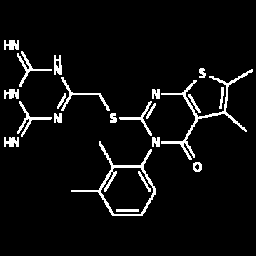

In [139]:
imgpath = next(train_imgpaths)
preprocess_image(imgpath)